In [1]:
import Ensemble
import numpy as np
import skimage
from skimage.io import imread,imsave
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

(1181, 1181, 3)
(50, 1181, 1181)


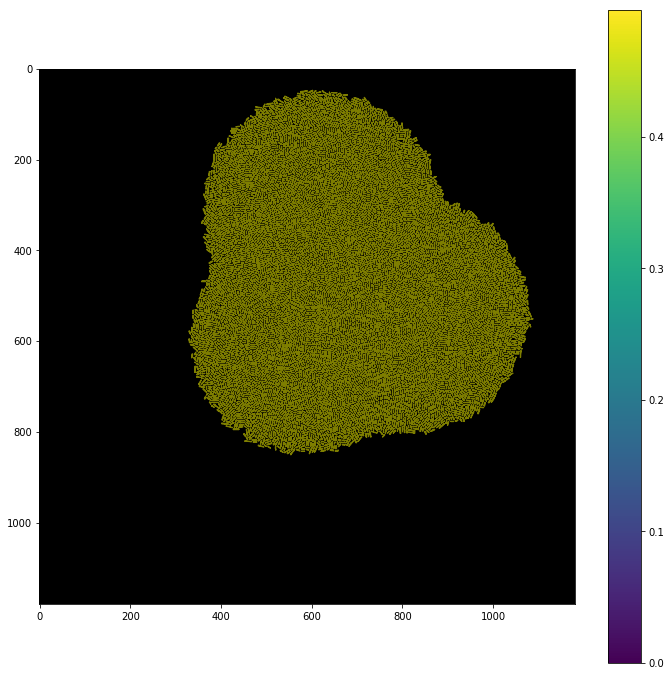

In [9]:
startframe = 100
step = 2
nframes = 50
nt = nframes-1
#filename = '/home/timrudge/cellmodeller/data/info_tracking-18-06-08-12-59/step-%05d.png'
#filename = '/home/timrudge/cellmodeller/data/random_grey-18-08-07-15-45/step-%05d.png'
#filename = '/media/timrudge/tjr34_ntfs/Microscopy/Cavendish/10.01.16/Pos0000/aligned_Frame%04dStep%04d.tiff'
#filename = '/home/timrudge/AndreaRavasioData/masked image/%02d.tif'
#filename = '/home/timrudge/ignacio_pickles/step-%05d.png'
#filename = '/home/timrudge/Code/InfoTracking/testdata/aligned_Frame%04dStep%04d.tif'
filename = '/Users/timrudge/cellmodeller/data/weiner-18-08-01-17-44/step-%05d.png'
ima = np.array([imread(filename%(startframe+(nframes-i)*step)).astype(np.float32) for i in range(nframes)])
#ima = ima[:,0:500,1000:1500]
imb = np.array([imread(filename%(startframe+(nframes-i)*step)).astype(np.float32) for i in range(nframes)])
#imb = imb[:,0:500,1000:1500]
im = np.zeros((ima.shape[0],ima.shape[1],ima.shape[2],3), dtype=np.float32)
im[:,:,:,0] = ima*2**16/2**8
im[:,:,:,1] = imb*2**16/2**8

print(im[0].shape)
plt.figure(figsize=(12,12))
plt.imshow(im[0]/2**16)
plt.colorbar()
eg = Ensemble.EnsembleGrid(im)
print(ima.shape)

In [10]:
eg.initialise_ensembles(64,64, 32,32, 8,8)
print(eg.gx,eg.gy)

(36, 36)


In [11]:
eg.compute_motion(nt,7,7,dt=1)

In [ ]:
eg.save_quivers('quivers', 'test_%04d.png', normed=False)
eg.save_paths('paths', 'test_%04d.png')

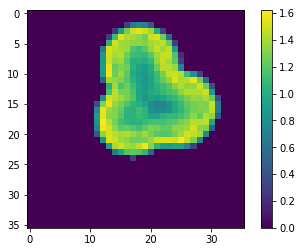

In [8]:
max_ll = eg.max_ll()
max_ll.shape
plt.imshow(-max_ll[:,:,0])
plt.colorbar()

In [ ]:
fluo = eg.fluo()
fluo.shape
plt.plot(fluo[5,5,:,0], fluo[5,5,:,1], '.')


In [ ]:
eg.save_data('nparrays')
pos = np.fromfile('nparrays/pos.np')
pos.shape

In [ ]:
eg.save_rois('rois', 'test_%04d_%04d_%04d.tif')